In [2]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray
import xarray as xr
from netCDF4 import Dataset
from shapely.geometry import mapping

# Historical Heatwaves Incidence

In this notebook, we will explore heatwaves incidence, based on [pre-calculated data](ttps://worldbankgroup.sharepoint.com.mcas.ms/teams/DevelopmentDataPartnershipCommunity-WBGroup/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=Yvwh8r&cid=fccdf23e%2D94d5%2D48bf%2Db75d%2D0af291138bde&FolderCTID=0x012000CFAB9FF0F938A64EBB297E7E16BDFCFD&id=%2Fteams%2FDevelopmentDataPartnershipCommunity%2DWBGroup%2FShared%20Documents%2FProjects%2FHeatwaves%20Data%20Collaborative%2FData%2Fremotesensing%2Fhwdi%5F5degC&viewid=80cdadb3%2D8bb3%2D47ae%2D8b18%2Dc1dd89c373c5) obtained from NASA's [GLDAS](https://ldas.gsfc.nasa.gov/gldas)

## Getting multiple datasets that calculate heatwaves based on different definitions

It appears the "ds_mean2" definition is not particularly relevant and does not include complete data, since most of the provinces observed do not have heatwaves before 2010 in this dataset, which seems incredibly unlikely.

In [3]:
# parallel ensures that it being parallel processing
#ds_mean3 = xr.open_mfdataset("../../data/gldas/ymean3/wld_cli_*.nc4", parallel=True)
# ds_percentile390 = xr.open_mfdataset("../../data/gldas/ypercentile90/wld_cli_*.nc4", parallel = True)
# ds_mean4= xr.open_mfdataset("../../data/gldas/ymean4/wld_cli_*.nc4", parallel = True)
# ds_percentile490= xr.open_mfdataset("../../data/gldas/ypercentile490/wld_cli_*.nc4", parallel = True)
ds_mean2=xr.open_mfdataset("/Users/anandafigueiredo/GitHub/hwdi_2010_21/wld_cli_*.nc4", parallel = True)
# ds_percentile290=xr.open_mfdataset("../../data/gldas/ypercentile290/wld_cli_*.nc4", parallel = True)

In [4]:
tasmax=xr.open_mfdataset("/Users/anandafigueiredo/Downloads/tasmax_norm/wld_cli_gldas20_tasmax_norm_ydrunpctl590_1948_2014.nc4")
tasmax

<xarray.Dataset>
Dimensions:  (time: 365, lon: 1440, lat: 600)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01T13:30:00 ... 2013-12-31T13:30:00
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float32 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
Data variables:
    Tasmax   (time, lat, lon) float32 dask.array<chunksize=(365, 600, 1440), meta=np.ndarray>
Attributes: (12/21)
    CDI:                    Climate Data Interface version 1.9.10 (https://mp...
    Conventions:            CF-1.6
    source:                 Noah_v3.6 forced with Princeton_V2.2
    institution:            NASA GSFC
    missing_value:          -9999.0
    tavg definision::       past 3-hour average
    ...                     ...
    DX:                     0.25
    DY:                     0.25
    history_L34RS:          'Created by L34RS v1.4.2 @ NASA GES DISC on Septe...
    frequency:              day
    history:                Mon Dec 05 18:21:49 2022: cdo -z zip_5 ydrunpctl,...
    CDO:                    Climate Data Operators version 1.9.10 (https://mp...

In [5]:
ds_1948 = xr.open_mfdataset('/Users/anandafigueiredo/GitHub/hwdi_2010_21/wld_cli_gldas20_tasmax_ydrunmean2_hwdi_1948.nc4')
ds_2021 = xr.open_mfdataset('/Users/anandafigueiredo/GitHub/hwdi_2010_21/wld_cli_gldas21_tasmax_ydrunmean2_hwdi_2021.nc4')

In [6]:
ds_1948

<xarray.Dataset>
Dimensions:                                                (time: 1, lon: 1440,
                                                            lat: 600)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * lon                                                    (lon) float32 -179...
  * lat                                                    (lat) float32 -59....
Data variables:
    heat_wave_duration_index_wrt_mean_of_reference_period  (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    heat_waves_per_time_period                             (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Thu Dec 08 04:41:45 2022: cdo -z zip_5 eca_hwdi,2,5 wld_cli...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

## Change in number of heatwaves from 1948 to 2021

In [ ]:
fig, ax = plt.subplots(
    1,
    2,
    sharex=True,
    sharey=True,
    figsize=(20, 5),
    gridspec_kw={"width_ratios": [1, 1.2]},
)

im = ds_1948["heat_waves_per_time_period"].plot(ax=ax[0], vmin=0, vmax=50)
im2 = ds_2021["heat_waves_per_time_period"].plot(ax=ax[1], vmin=0, vmax=50)
# cbar_ax = fig.add_axes([0, 10, 20, 40])
# fig.colorbar(im, cax=cbar_ax)
# ax.axis('off')

ax[0].set_title("1948")
ax[1].set_title("2021")

# ax[0].get_legend().remove()

for i in [0, 1]:
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].axis("off")

handles, labels = ax[1].get_legend_handles_labels()
# print(labels)

cb = im.colorbar
cb.remove()

cb = im2.colorbar
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel("# of heatwaves", rotation=270)

Exploring the data, 

In [8]:
# time_bnds = [(np.datetime64("1948-01-01"), np.datetime64("2022-04-30"))]
# time_var = ds_tasmax.variables["time"]
# start_date = np.datetime64("2022-02-01")
# end_date = np.datetime64("2022-04-30")

# start_index = np.where(time_var[:] == start_date)[0]
# end_index = np.where(time_var[:] == end_date)[0]

### Boundaries of the region of interest

In this part, we get the shapefiles of the country we're interested in looking at

In [7]:
def clip_area(ds, area):

    ds.rio.write_crs("EPSG:4326", inplace=True)
    clipped_area = ds.rio.clip(area.geometry.values,all_touched=True, drop=True)

    return clipped_area


### Philippines

In [8]:
# Provinces
phil_prov=geopandas.read_file('/Users/anandafigueiredo/GitHub/phl_adminboundaries_candidate_exclude_adm3/phl_admbnda_adm2_psa_namria_20200529.shp')
phil_prov

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.640967,0.334223,Abra,PH140100000,NaN,NaN,NaN,Cordillera Administrative Region,PH140000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"POLYGON ((120.96109 17.95348, 120.97201 17.946..."
1,3.674955,0.220065,Agusan del Norte,PH160200000,NaN,NaN,NaN,Region XIII,PH160000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((125.58886 9.45793, 125.59687 9..."
2,5.222636,0.693968,Agusan del Sur,PH160300000,NaN,NaN,NaN,Region XIII,PH160000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"POLYGON ((125.88961 8.98195, 125.88896 8.96446..."
3,4.626091,0.139664,Aklan,PH060400000,NaN,NaN,NaN,Region VI,PH060000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((122.43980 11.59717, 122.43979 ..."
4,6.507665,0.205939,Albay,PH050500000,NaN,NaN,NaN,Region V,PH050000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((124.20992 13.16871, 124.20993 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,15.971439,0.094186,Tawi-Tawi,PH157000000,NaN,NaN,NaN,Bangsamoro Autonomous Region in Muslim Mindanao,PH150000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((119.46876 4.59360, 119.46881 4..."
83,5.329770,0.313705,Zambales,PH037100000,NaN,NaN,NaN,Region III,PH030000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((120.11687 14.76309, 120.11689 ..."
84,8.170921,0.515482,Zamboanga del Norte,PH097200000,NaN,NaN,NaN,Region IX,PH090000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((122.09474 7.53104, 122.09482 7..."
85,11.811347,0.439807,Zamboanga del Sur,PH097300000,NaN,NaN,NaN,Region IX,PH090000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((122.05710 6.87274, 122.05724 6..."


In [ ]:
display(phil_prov["ADM2_EN"])

### Metro Manila

In [11]:
manila=phil_prov[phil_prov["ADM2_EN"] == "NCR, City of Manila, First District"]
ncr2=phil_prov[phil_prov["ADM2_EN"] == "NCR, Second District"]
ncr3=phil_prov[phil_prov["ADM2_EN"] == "NCR, Third District"]
ncr4=phil_prov[phil_prov["ADM2_EN"] == "NCR, Fourth District"]

In [12]:
ncr=geopandas.GeoDataFrame(pd.concat([manila,ncr2,ncr3,ncr4], ignore_index=True))

In [13]:
ncr.crs=manila.crs

<Axes: xlabel='time'>

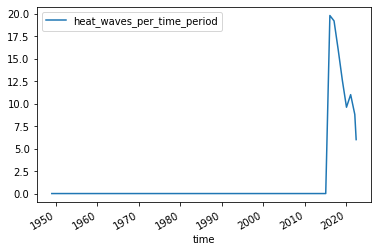

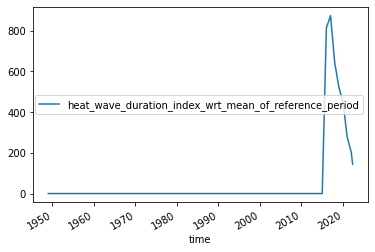

In [14]:
clipped_ncr=clip_area(ds_mean2,ncr)
clipped_ncr
ncr_mean2=clipped_ncr.to_dataframe().groupby(['time']).mean().reset_index()
ncr_mean2.plot(x='time',y='heat_waves_per_time_period')
ncr_mean2.plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')


Utilizing TasMax as the definition instead

<Axes: xlabel='time'>

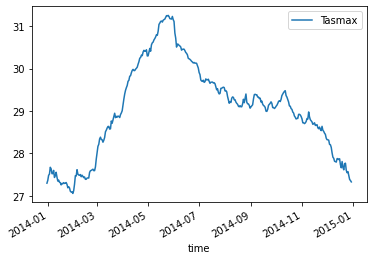

In [24]:
clipped_ncr=clip_area(tasmax,ncr)
clipped_ncr
ncr_tasmax = clipped_ncr.to_dataframe().groupby(['time']).mean().reset_index()
ncr_tasmax.plot(x='time',y='Tasmax')

Text(0.5, 1.0, 'Number of heatwaves using different definitions of a heatwave')

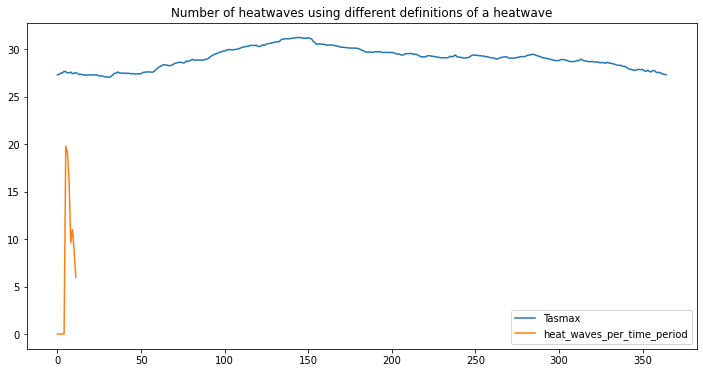

In [29]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12, 6))
ncr_tasmax[["Tasmax"]].plot(ax=ax, label="tasmax")
ncr_mean2[["heat_waves_per_time_period"]].plot(ax=ax)
# ncr_mean2[["heat_wave_duration_index_wrt_mean_of_reference_period"]].plot(ax=ax)


# plt.legend(
#     ("percentile390", "percentile490", "percentile390", "mean3", "mean4", "mean2"),
#     loc="upper left",
# )
plt.title("Number of heatwaves using different definitions of a heatwave")

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12, 6))
ncr_tasmax[["Tasmax"]].plot(ax=ax, label="tasmax")
ncr_mean2[["heat_waves_per_time_period"]].plot(ax=ax)
# ncr_mean2[["heat_wave_duration_index_wrt_mean_of_reference_period"]].plot(ax=ax)


# plt.legend(
#     ("percentile390", "percentile490", "percentile390", "mean3", "mean4", "mean2"),
#     loc="upper left",
# )
plt.title("Number of heatwaves using different definitions of a heatwave")

Loading city shapefiles

In [15]:
phil=geopandas.read_file('/Users/anandafigueiredo/GitHub/phl_adminboundaries_candidate_exclude_adm3/phl_admbnda_adm0_psa_namria_20200529.shp')

### Cebu - Humid City

Doesn't have ds2_mean data

<Axes: xlabel='time'>

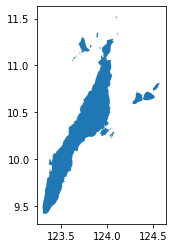

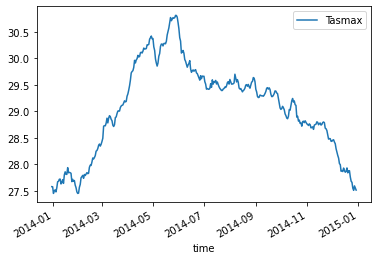

In [12]:
cebu=phil_prov[phil_prov["ADM2_EN"] == "Cebu"]
cebu.plot()
clipped_cebu=clip_area(tasmax, cebu)
clipped_cebu.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='Tasmax')
# clipped_cebu.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

<Axes: xlabel='time'>

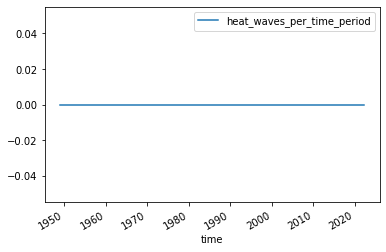

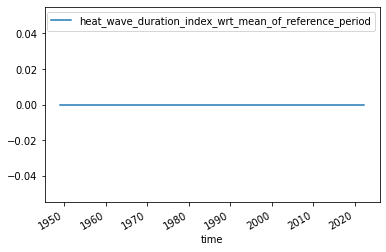

In [13]:
clipped_cebu=clip_area(ds_mean2, cebu)
clipped_cebu.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_cebu.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Aurora - rural area

<Axes: xlabel='time'>

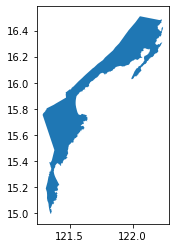

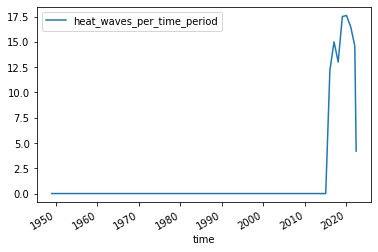

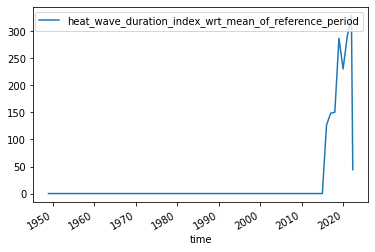

In [16]:

aurora=phil_prov[phil_prov["ADM2_EN"] == "Aurora"]
aurora.plot()
clipped_aur=clip_area(ds_mean2, aurora)
clipped_aur.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_aur.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Palawan - rural area

<Axes: xlabel='time'>

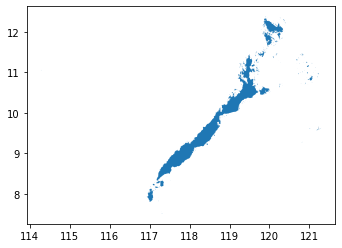

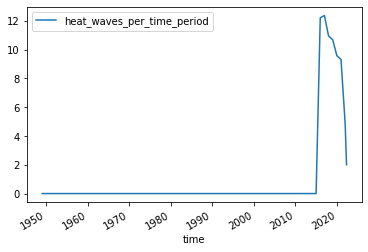

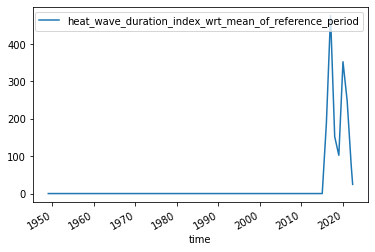

In [18]:

palawan=phil_prov[phil_prov["ADM2_EN"] == "Palawan"]
palawan.plot()
clipped_pal=clip_area(ds_mean2, palawan)
clipped_pal.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_pal.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Agusan del Sur - rural area

<Axes: xlabel='time'>

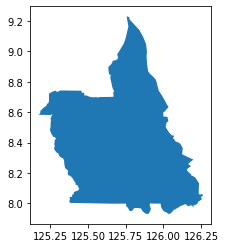

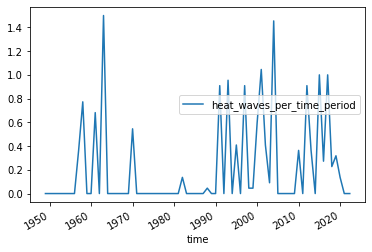

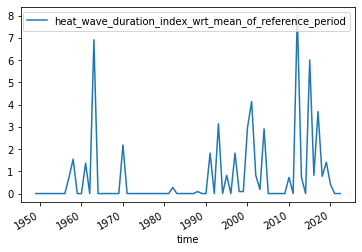

In [19]:

agusur=phil_prov[phil_prov["ADM2_EN"] == "Agusan del Sur"]
agusur.plot()
clipped_agusur=clip_area(ds_mean2, agusur)
clipped_agusur.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_agusur.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Apayao - least dense province in Phil

<Axes: xlabel='time'>

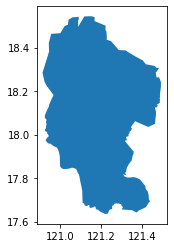

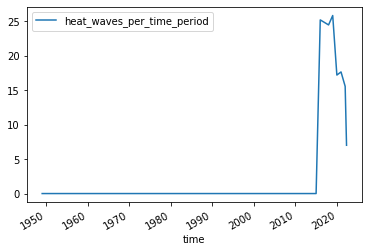

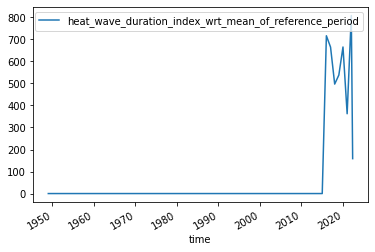

In [20]:

apayao=phil_prov[phil_prov["ADM2_EN"] == "Apayao"]
apayao.plot()
clipped_apa=clip_area(ds_mean2, apayao)
clipped_apa.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_apa.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Abra - 2nd least dense province in Phil

<Axes: xlabel='time'>

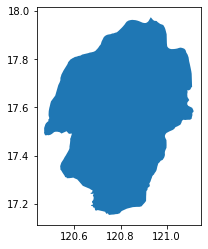

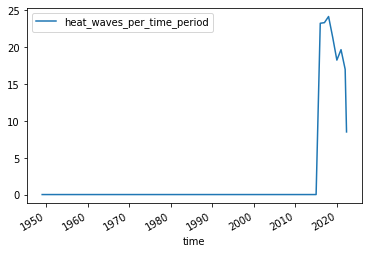

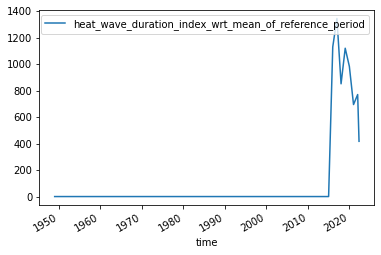

In [21]:

abra=phil_prov[phil_prov["ADM2_EN"] == "Abra"]
abra.plot()
clipped_abra=clip_area(ds_mean2, abra)
clipped_abra.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_abra.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Agusan del Norte - hot area

<Axes: xlabel='time'>

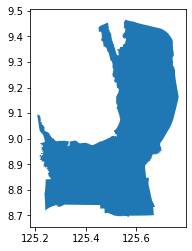

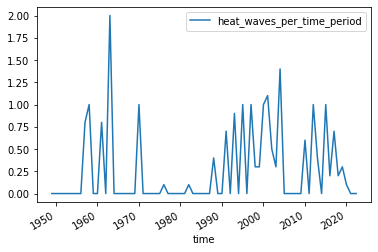

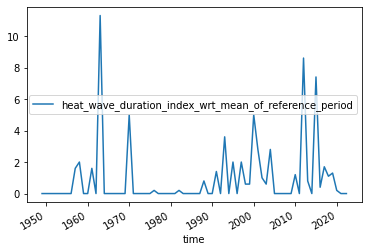

In [22]:

agunor=phil_prov[phil_prov["ADM2_EN"] == "Agusan del Norte"]
agunor.plot()
clipped_agunor=clip_area(ds_mean2, agunor)
clipped_agunor.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_agunor.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Zamboanga del Norte - hot area

<Axes: xlabel='time'>

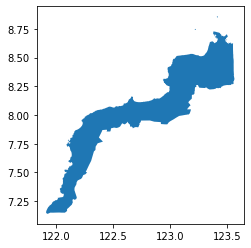

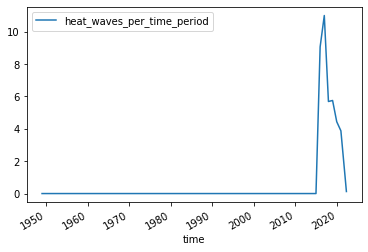

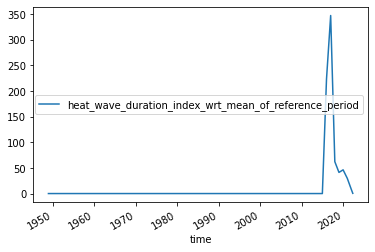

In [23]:

zamnor=phil_prov[phil_prov["ADM2_EN"] == "Zamboanga del Norte"]
zamnor.plot()
clipped_zamnor=clip_area(ds_mean2, zamnor)
clipped_zamnor.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_zamnor.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Zamboanga del Sur - hot area

<Axes: xlabel='time'>

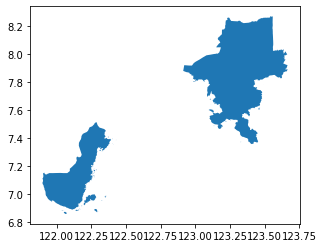

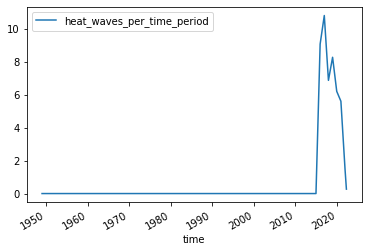

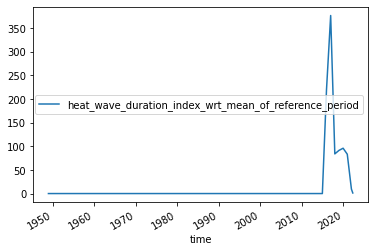

In [24]:

zamsur=phil_prov[phil_prov["ADM2_EN"] == "Zamboanga del Sur"]
zamsur.plot()
clipped_zamsur=clip_area(ds_mean2, zamsur)
clipped_zamsur.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_zamsur.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### Pangasinan - hot area

<Axes: xlabel='time'>

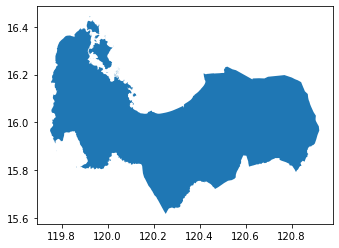

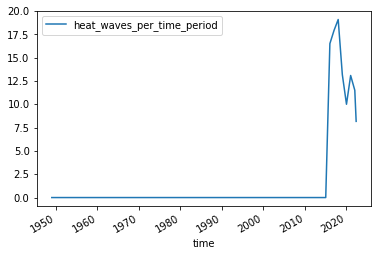

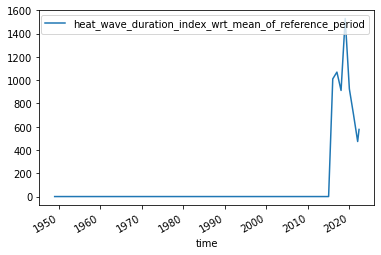

In [25]:

panga=phil_prov[phil_prov["ADM2_EN"] == "Pangasinan"]
panga.plot()
clipped_panga=clip_area(ds_mean2, panga)
clipped_panga.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_panga.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

### All of the Philippines, average

<Axes: >

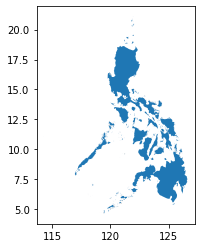

In [88]:
phil.plot()

In [90]:
clipped_phil=clip_area(ds_mean2, phil)
clipped_phil

<xarray.Dataset>
Dimensions:                                                (time: 13, lon: 50,
                                                            lat: 67)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * lon                                                    (lon) float32 114....
  * lat                                                    (lat) float32 4.62...
    spatial_ref                                            int64 0
Data variables:
    heat_wave_duration_index_wrt_mean_of_reference_period  (time, lat, lon) float32 dask.array<chunksize=(1, 67, 50), meta=np.ndarray>
    heat_waves_per_time_period                             (time, lat, lon) float32 dask.array<chunksize=(1, 67, 50), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Thu Dec 08 04:59:51 2022: cdo -z zip_5 eca_hwdi,2,5 wld_cli...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

<Axes: xlabel='time'>

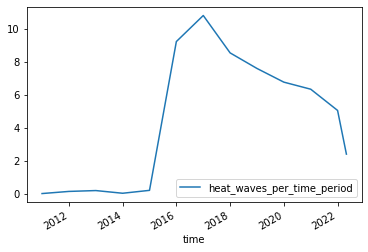

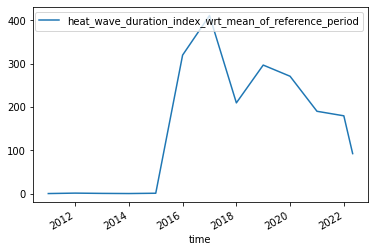

In [95]:
clipped_phil.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')
clipped_phil.to_dataframe().groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

In [98]:
print(type(clipped_phil))

<class 'pandas.core.frame.DataFrame'>


<Axes: >

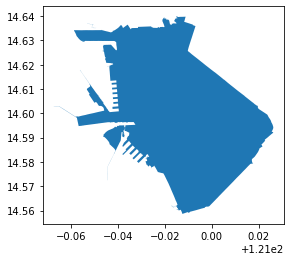

In [11]:
manila.plot()

## Clipping

In [19]:
manila

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
53,0.613781,0.00352,"NCR, City of Manila, First District",PH133900000,NaN,NaN,NaN,National Capital Region,PH130000000,Philippines (the),PH,2016-06-30,2020-05-29,NaN,"MULTIPOLYGON (((120.94997 14.63625, 120.94997 ..."


In [12]:
# import shapely
# manila['geometry'] = manila['geometry'].apply(lambda x: shapely.wkb.loads(
#         shapely.wkb.dumps(x, output_dimension=2)))

/Users/anandafigueiredo/opt/miniconda3/envs/plotting/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [13]:
def clip_area(ds, area):

    ds.rio.write_crs("EPSG:4326", inplace=True)
    clipped_area = ds.rio.clip(area.geometry.values,all_touched=True, drop=True)

    return clipped_area


In [33]:
clipped_man=clip_area(ds_mean2, manila)
# clipped_hyd = clip_area(ds_mean2, HYDERABAD)
# clipped_chennai = clip_area(ds_mean2, CHENNAI)
# clipped_delhi = clip_area(ds_mean2, DELHI)
# clipped_mumbai = clip_area(ds_mean2, MUMBAI)

In [34]:
clipped_man['heat_waves_per_time_period'].values

array([[[nan,  0.]],

       [[nan,  0.]],

       [[nan,  0.]],

       [[nan,  0.]],

       [[nan,  0.]],

       [[nan, 33.]],

       [[nan, 28.]],

       [[nan, 22.]],

       [[nan, 19.]],

       [[nan, 15.]],

       [[nan, 18.]],

       [[nan, 15.]],

       [[nan,  8.]]], dtype=float32)

In [35]:
ds_mean2

<xarray.Dataset>
Dimensions:                                                (time: 13,
                                                            lon: 1440, lat: 600)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * lon                                                    (lon) float32 -179...
  * lat                                                    (lat) float32 -59....
    spatial_ref                                            int64 0
Data variables:
    heat_wave_duration_index_wrt_mean_of_reference_period  (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    heat_waves_per_time_period                             (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Thu Dec 08 04:59:51 2022: cdo -z zip_5 eca_hwdi,2,5 wld_cli...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

Now, converting to a dataframe and `geopandas.GeoDataFrame`

In [29]:

clipped_man = clipped_man.to_dataframe().reset_index()
# clipped_man=convert_to_gdf(clipped_man)
# clipped_hyd = convert_to_gdf(clipped_hyd)
# clipped_chennai = convert_to_gdf(clipped_chennai)
# clipped_delhi = convert_to_gdf(clipped_delhi)
# clipped_mumbai = convert_to_gdf(clipped_mumbai)

In [32]:
clipped_man

,time,lon,lat,spatial_ref,heat_wave_duration_index_wrt_mean_of_reference_period,heat_waves_per_time_period
0,2010-12-31 13:30:00,120.875,14.625,0,NaN,NaN
1,2010-12-31 13:30:00,121.125,14.625,0,0.0,0.0
2,2011-12-31 13:30:00,120.875,14.625,0,NaN,NaN
3,2011-12-31 13:30:00,121.125,14.625,0,0.0,0.0
4,2012-12-31 13:30:00,120.875,14.625,0,NaN,NaN
5,2012-12-31 13:30:00,121.125,14.625,0,0.0,0.0
6,2013-12-31 13:30:00,120.875,14.625,0,NaN,NaN
7,2013-12-31 13:30:00,121.125,14.625,0,0.0,0.0
8,2014-12-31 13:30:00,120.875,14.625,0,NaN,NaN
9,2014-12-31 13:30:00,121.125,14.625,0,0.0,0.0


<Axes: xlabel='time'>

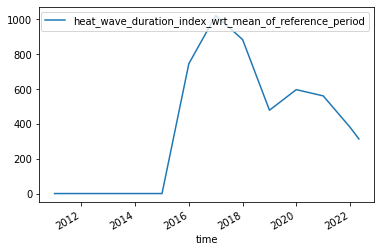

In [116]:
clipped_man.groupby(['time']).mean().reset_index().plot(x='time',y='heat_wave_duration_index_wrt_mean_of_reference_period')

<Axes: xlabel='time'>

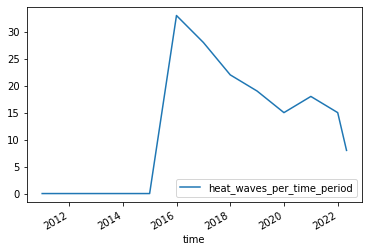

In [113]:
clipped_man.groupby(['time']).mean().reset_index().plot(x='time',y='heat_waves_per_time_period')

In [18]:
clipped_man[['time', 'lat', 'lon']]

,index,time,lon,lat,spatial_ref,heat_wave_duration_index_wrt_mean_of_reference_period,heat_waves_per_time_period,geometry
0,0,2010-12-31 13:30:00,120.875,14.625,0,NaN,NaN,POINT (120.87500 14.62500)
1,1,2010-12-31 13:30:00,121.125,14.625,0,0.0,0.0,POINT (121.12500 14.62500)
2,2,2011-12-31 13:30:00,120.875,14.625,0,NaN,NaN,POINT (120.87500 14.62500)
3,3,2011-12-31 13:30:00,121.125,14.625,0,0.0,0.0,POINT (121.12500 14.62500)
4,4,2012-12-31 13:30:00,120.875,14.625,0,NaN,NaN,POINT (120.87500 14.62500)
5,5,2012-12-31 13:30:00,121.125,14.625,0,0.0,0.0,POINT (121.12500 14.62500)
6,6,2013-12-31 13:30:00,120.875,14.625,0,NaN,NaN,POINT (120.87500 14.62500)
7,7,2013-12-31 13:30:00,121.125,14.625,0,0.0,0.0,POINT (121.12500 14.62500)
8,8,2014-12-31 13:30:00,120.875,14.625,0,NaN,NaN,POINT (120.87500 14.62500)
9,9,2014-12-31 13:30:00,121.125,14.625,0,0.0,0.0,POINT (121.12500 14.62500)


## 